Extract images from a Tensorboard log and create an animated GIF from it to show per epoch output evolution

In [ ]:
# %pip install imageio

In [2]:
import imageio
from tensorboard.backend.event_processing import event_accumulator
from IPython.display import Image as ImageIPython
from IPython.display import display
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [3]:
def extract_images_from_tensorboard_logs(event_files_paths, tag_name):
    epoch = 0
    size_guidance = {
        'images': 0,  # I didn't set it first so only 4 images were fetched
    }
    
    if not isinstance(event_files_paths, list):
        event_files_paths = [event_files_paths]
            
    images = []
    for event_path in event_files_paths:
        accumulator = event_accumulator.EventAccumulator(event_path, size_guidance)
        accumulator.Reload()
        
        if tag_name not in accumulator.Tags()['images']:
            continue
        
        for event in accumulator.Images(tag_name):
            img = event.encoded_image_string
            img = imageio.imread(img)
            img = Image.fromarray(img.astype(np.uint8))
            
            draw = ImageDraw.Draw(img)
            font = ImageFont.load_default()
            text = f"Epoch: {epoch}"
            
            epoch += 1
            
            _, height = img.size
            position = (10, height - 15)
            draw.text(position, text, font=font, fill="green")
            
            images.append(img)
        epoch -= 1 # because if we have multiple paths it's because we reloaded the model, so it will print the same image twice
        if event_path != event_files_paths[-1]:
            images.pop(-1)
        

    return images

def create_gif(images, output_file_path, fps=3, pause_duration=3):
    with imageio.get_writer(output_file_path, mode='I', fps=fps, loop=0) as writer:
        for image in images:
            writer.append_data(image)
            
        for _ in range(pause_duration):
            writer.append_data(images[-1])
            

C:\Users\robin\AppData\Local\Temp\ipykernel_54640\3636424976.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img)


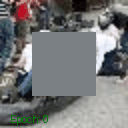

In [5]:
# event_file_path = [
#     "Context_Encoder_Inpainting/lightning_logs/image_net_128_test_2/events.out.tfevents.1734222086.DESKTOP-FJJ9EF5.23524.0",
#     "Context_Encoder_Inpainting/lightning_logs/imagenet_128_batch_size_512_after_epoch_20/events.out.tfevents.1734260064.DESKTOP-FJJ9EF5.4408.0",
#     "Context_Encoder_Inpainting/lightning_logs/imagenet_128_batch_size_512_after_epoch_20/events.out.tfevents.1734268609.DESKTOP-FJJ9EF5.4408.1",
# ]
event_file_path = "Context_Encoder_Inpainting/lightning_logs/version_0/events.out.tfevents.1734356279.DESKTOP-FJJ9EF5.34952.1"
output_gif_path = "results_images/tiny_image_net_0.gif"
tag_name = "validation/inpainted_image_0"

# Extract images and save as GIF
images = extract_images_from_tensorboard_logs(event_file_path, tag_name)
create_gif(images, output_gif_path)

display(ImageIPython(filename=output_gif_path))